In [129]:
import torch
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.profiler import profile, ProfilerActivity, record_function
from torch.utils.flop_counter import FlopCounterMode
import psutil
import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer
import random
import torch 
from torch.optim import SGD

### Exercise 3.3

Use PyTorch to optimize a simple 2D function such as f (x, y) = x2 + y2 (minimization) or f (x, y) = −x2 − y2
(maximization). Run gradient descent using torch.optim.SGD under the following settings:
(a) Vary momentum between 0 and 0.9, and visualize the trajectory of (x, y) on the contour plot of the function.
(b) Repeat (a) with weight_decay set to a small value (e.g., 0.1). What changes do you observe?
(c) Try setting maximize=True on f (x, y) = −x2 − y2. What changes do you observe?
Generate 2 to 3 plots to support your discussion. Include a link to your code and briefly interpret what each
knob changes about the optimization behavior.

In [130]:
def min(x, y):
    return x**2 + 0.5*y**2

def max(x, y):
    return -1*(x*x + 0.5*y*y)

In [131]:
# optimize
def optimize(func, momentum, weight_decay=0.0, maximize=False, lr=0.05, steps=100, x=-1.0, y=1.0):
    if x is None:
        x = torch.randn(1, requires_grad=True)
    else:
        x = torch.tensor(x, requires_grad=True)
    if y is None:
        y = torch.randn(1, requires_grad=True)
    else:
        y = torch.tensor(y, requires_grad=True)

    optimizer = SGD([x, y], lr=lr, momentum=momentum, weight_decay=weight_decay, maximize=maximize)

    trajectory = [(x.item(), y.item())]
    for step in range(steps):
        optimizer.zero_grad()
        z = func(x, y)
        z.backward()
        optimizer.step()
        trajectory.append((x.item(), y.item()))

    return trajectory

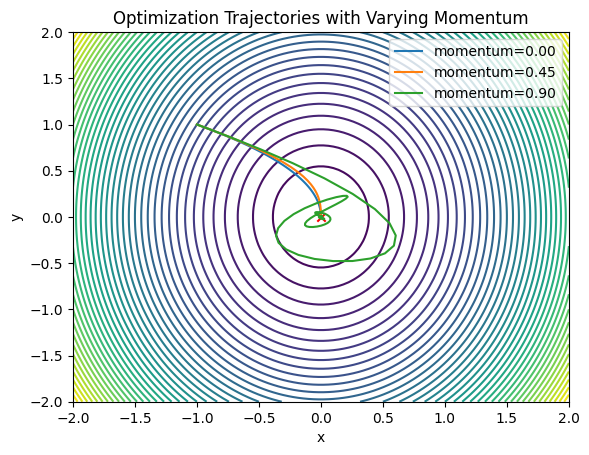

In [132]:
# vary momentum
momentums = torch.linspace(0, 0.9, steps=3)
trajectories = [optimize(min, m.item()) for m in momentums]
# plot
x = torch.linspace(-2, 2, steps=100)
y = torch.linspace(-2, 2, steps=100)
X, Y = torch.meshgrid(x, y)
Z = min(X, Y)
plt.contour(X, Y, Z, levels=50)
for i, traj in enumerate(trajectories):
    traj = torch.tensor(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f'momentum={momentums[i]:.2f}')
plt.scatter(0, 0, color='red', marker='x')  # minimum
plt.title('Optimization Trajectories with Varying Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

101


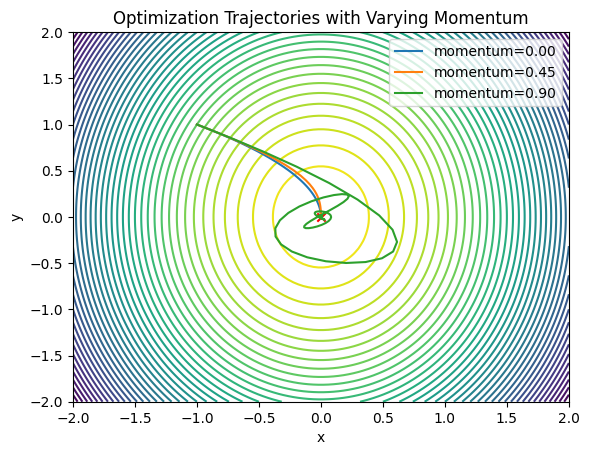

In [138]:
# vary momentum
momentums = torch.linspace(0, 0.9, steps=3)
trajectories = [optimize(max, m.item(), weight_decay=0.1, maximize=True) for m in momentums]
print(len(trajectories[0]))
# plot
x = torch.linspace(-2, 2, steps=100)
y = torch.linspace(-2, 2, steps=100)
X, Y = torch.meshgrid(x, y)
Z = max(X, Y)
plt.contour(X, Y, Z, levels=50)
for i, traj in enumerate(trajectories):
    traj = torch.tensor(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f'momentum={momentums[i]:.2f}')
plt.scatter(0, 0, color='red', marker='x')  # minimum
plt.title('Optimization Trajectories with Varying Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

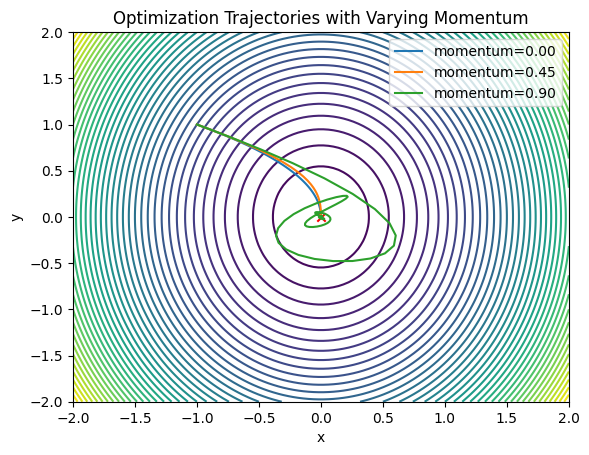

In [135]:
# vary momentum
momentums = torch.linspace(0, 0.9, steps=3)
trajectories = [optimize(min, m.item()) for m in momentums]
# plot
x = torch.linspace(-2, 2, steps=100)
y = torch.linspace(-2, 2, steps=100)
X, Y = torch.meshgrid(x, y)
Z = min(X, Y)
plt.contour(X, Y, Z, levels=50)
for i, traj in enumerate(trajectories):
    traj = torch.tensor(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f'momentum={momentums[i]:.2f}')
plt.scatter(0, 0, color='red', marker='x')  # minimum
plt.title('Optimization Trajectories with Varying Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()